In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("car_purchasing.csv", encoding="latin-1")

In [3]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
data.shape

(500, 9)

In [6]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [17]:
data[['age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount']].corr()["car purchase amount"].sort_values(ascending=False)

car purchase amount    1.000000
age                    0.632865
annual Salary          0.617862
net worth              0.488580
credit card debt       0.028882
Name: car purchase amount, dtype: float64

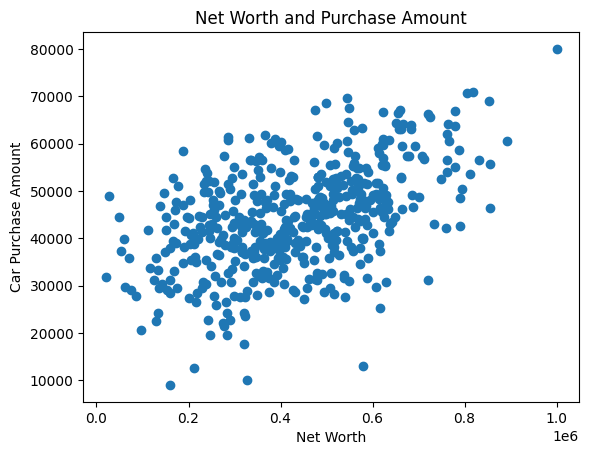

In [8]:
plt.scatter(data["net worth"],data["car purchase amount"])
plt.title("Net Worth and Purchase Amount")
plt.xlabel("Net Worth")
plt.ylabel("Car Purchase Amount")
plt.show()

In [9]:
data[data["country"] == "Kyrgyzstan"]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
67,Lev Kramer,eu.odio@tristique.org,Kyrgyzstan,1,42.695289,59195.82899,8634.376791,573054.3808,43680.91327
198,Christian Hernandez,dolor@vehiculaPellentesque.co.uk,Kyrgyzstan,1,49.931519,55293.50777,9465.090098,629764.2743,49220.02180
260,Ulysses X. Burch,Sed.nunc.est@arcuMorbi.edu,Kyrgyzstan,0,51.297716,74810.89471,13658.342010,286849.7875,51405.55229
393,"Decker, Jolie T.",pellentesque.massa.lobortis@facilisis.net,Kyrgyzstan,1,41.270010,65826.12291,11715.371400,416748.7309,41679.79290
427,Adrienne,mauris.Morbi@ligulatortordictum.net,Kyrgyzstan,0,38.039122,75901.81829,6512.711020,357468.1866,42905.53815


In [ ]:
data[data["age"] < 25]

TypeError: Invalid comparison between dtype=float64 and str

In [10]:
data["country"].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

In [11]:
data["Gender2"] = data["gender"].apply(lambda x: "Female" if x ==0 else "Male")

In [12]:
data["Gender2"].value_counts()

Gender2
Male      253
Female    247
Name: count, dtype: int64

In [13]:
data.groupby("Gender2")["age"].max()

Gender2
Female    70.000000
Male      69.569306
Name: age, dtype: float64

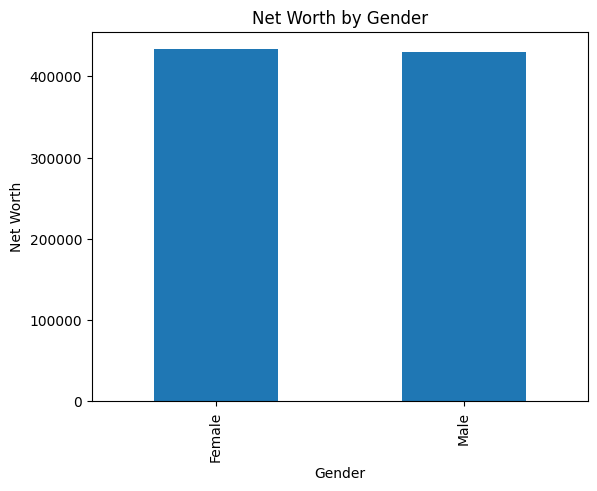

In [14]:
data.groupby("Gender2")["net worth"].mean().plot(kind= "bar")
plt.xlabel("Gender")
plt.ylabel("Net Worth")
plt.title("Net Worth by Gender")
plt.show()

In [15]:
data["age"].head()

0    41.851720
1    40.870623
2    43.152897
3    58.271369
4    57.313749
Name: age, dtype: float64

In [18]:
def age_groups_creation(row):
    if row["age"] < 30:
        return "20 - 30"
    elif row["age"] < 40:
        return "30 - 40"
    elif row["age"] < 50:
        return "40 - 50"
    elif row["age"] < 60:
        return "50 - 60"
    else:
        return "60 - 70"

In [19]:
data["Age Ranges"] = data.apply(age_groups_creation,axis=1)

In [20]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,Gender2,Age Ranges
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,Female,40 - 50
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,Female,40 - 50
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,Male,40 - 50
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,Male,50 - 60
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,Male,50 - 60


In [21]:
data["Age Ranges"].value_counts()

Age Ranges
40 - 50    231
50 - 60    142
30 - 40     96
60 - 70     23
20 - 30      8
Name: count, dtype: int64

In [22]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth', 'car purchase amount',
       'Gender2', 'Age Ranges'],
      dtype='object')

In [23]:
X = data[["age","annual Salary","net worth"]]
Y = data[["car purchase amount"]]

In [24]:
X

,age,annual Salary,net worth
0,41.851720,62812.09301,238961.2505
1,40.870623,66646.89292,530973.9078
2,43.152897,53798.55112,638467.1773
3,58.271369,79370.03798,548599.0524
4,57.313749,59729.15130,560304.0671
...,...,...,...
495,41.462515,71942.40291,541670.1016
496,37.642000,56039.49793,360419.0988
497,53.943497,68888.77805,764531.3203
498,59.160509,49811.99062,337826.6382


In [25]:
Y

,car purchase amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248
...,...
495,48901.44342
496,31491.41457
497,64147.28888
498,45442.15353


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [38]:
len(X_train)

400

In [39]:
len(X_test)

100

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_train

array([[-2.41823633, -0.57575442,  1.05170339],
       [-0.37872984, -1.26182723,  0.77208254],
       [-1.17591012,  0.54719667,  1.12529326],
       ...,
       [-0.60376999, -0.93774609,  0.15618165],
       [ 1.19019979, -1.91449014, -0.34090143],
       [ 0.48552324,  0.80027809,  0.54013857]])

In [44]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [45]:
X_test = scaler.fit_transform(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test,predictions)))
    print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(y_test,predictions))))

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
predicitons_linear_regression = lr.predict(X_test)

In [50]:
modelresults(predicitons_linear_regression)

Mean absolute error on model is 607.5090983103025
Root mean squared error on model is 747.2434748997688


In [51]:
data["car purchase amount"].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

In [52]:
from sklearn.svm import SVR

In [53]:
svrmodel = SVR()


In [54]:
param_gridsvr= {"C": [0.01, 0.1, 0.5], "kernel" : ["linear","rbf","poly"], "degree":[2,3,4]}

In [55]:
from sklearn.model_selection import GridSearchCV
gridsvr = GridSearchCV(svrmodel, param_gridsvr)

In [56]:
gridsvr.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.5], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']})

In [57]:
predictions_gridsvr = gridsvr.predict(X_test)

In [58]:
modelresults(predictions_gridsvr)

Mean absolute error on model is 9087.039814121346
Root mean squared error on model is 11191.681505172426


In [59]:
gridsvr.best_params_

{'C': 0.5, 'degree': 2, 'kernel': 'linear'}

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridrfr = {"max_depth": [8,9,10,11,12,13], "n_estimators" : [11,12,10,13,14,15,16,17]}

In [61]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)

In [62]:
gridrfr.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [8, 9, 10, 11, 12, 13],
                         'n_estimators': [11, 12, 10, 13, 14, 15, 16, 17]})

In [63]:
predictionsrfr = gridrfr.predict(X_test)

In [64]:
modelresults(predictionsrfr)

Mean absolute error on model is 1721.3603361700232
Root mean squared error on model is 2635.8761278429383


In [65]:
gridrfr.best_params_

{'max_depth': 12, 'n_estimators': 17}

In [66]:
lr

LinearRegression()

In [67]:
joblib.dump(lr, "model.pkl")

['model.pkl']

In [ ]:
model = joblib.load("model.pkl")
model.predict()